In [1]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error,explained_variance_score
from keras.layers.core import Dropout
from tensorflow.keras.models import Sequential
from keras.datasets import mnist
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from keras.layers.core import Activation
from sklearn import preprocessing
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score
from keras.layers.core import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from keras.layers.core import Activation
from sklearn import preprocessing
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score
import seaborn as sns
from sklearn.metrics import mean_absolute_error,explained_variance_score,mean_absolute_error,explained_variance_score,r2_score,mean_squared_error


In [2]:
#excel dosyamızı okuyoruz ve id sütunumuzu çıkartıyoruz.
#Reading the excel file and taking out the id column

df = pd.read_csv('diamonds.csv')
df = df.drop('id',axis=1)

# null değer bulunmamakta
df.isnull().sum()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
print(df.head(10))

   carat        cut color clarity  depth  table  price     x     y     z
0   0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
5   0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96  2.48
6   0.24  Very Good     I    VVS1   62.3   57.0    336  3.95  3.98  2.47
7   0.26  Very Good     H     SI1   61.9   55.0    337  4.07  4.11  2.53
8   0.22       Fair     E     VS2   65.1   61.0    337  3.87  3.78  2.49
9   0.23  Very Good     H     VS1   59.4   61.0    338  4.00  4.05  2.39


In [4]:
print(df.dtypes)
df_othercolumns=df.drop('price',axis=1)
df_price=df['price']


carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object


In [5]:
# string değerlerimizi binary haline getiriyoruz
#string to binary
df = pd.get_dummies(df, columns=['cut'])
df = pd.get_dummies(df, columns=['clarity'])
df = pd.get_dummies(df, columns=['color'])

df.head()


,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,clarity_VS2,clarity_VVS1,clarity_VVS2,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [6]:
df.describe()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,clarity_VS2,clarity_VVS1,clarity_VVS2,color_D,color_E,color_F,color_G,color_H,color_I,color_J
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,...,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734,0.029848,0.090953,0.399537,...,0.227253,0.067760,0.093919,0.125603,0.181628,0.176900,0.209344,0.153949,0.100519,0.052058
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699,0.170169,0.287545,0.489808,...,0.419061,0.251337,0.291719,0.331404,0.385541,0.381588,0.406844,0.360903,0.300694,0.222146
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:

#giris, input
X = df.drop('price',axis=1).values
#cıkıs output
Y = df_price.values

#Burada verilerimizin ne kadarını öğreteceğimizi belirliyoruz test_size=0.2 demek verilerimin %80'i öğrenme için %20'si 
#test için kullanılacak diyoruz. random_state=101 ise verilerin kendi arasında karıştırılmasıdır. 
#Overfitting durumunda bu rakam arttırılır çünkü peş peşe gelen aynı değerler makinenin ezberlemesine sebep olur.

#In this code we determine how much of our data will lern. test_size=0.2 means that we are teaching %80 of our data. 
#%20 is for the tests. random_state = 101 is the mixing of data among themselves.
#we can increase random_state if we have overfitting situation

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [8]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape[1])

26


In [9]:
#Ara katmanları ekliyoruz. Bizim modelimiz relu fonksiyonunu kullandık
#We add intermediate layers. In our model we used the relu function

model = Sequential()
model.add(Dense(10,input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))

model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_3 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_4 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 21        
Total params: 1,771
Trainable params: 1,771
Non-trainable params: 0
______________________________________________________

In [10]:
#Bu aşamada batch_size ve epoch belirleyip modelimizin grafiklerini çiziyoruz
#batch_size bilgisayarın GPU'suna göre belirleniz 64-512 arası idealdir
#epoch adım sayısıdır 

#batch_size determined by the computer's GPU.batch_size should be 64-512 
#epoch is the number of steps
#At this stage, we determine the batch_size and epoch and draw the graphics of our model.


# lr,epoch sayısı belirleme
lr=0.1
num_epochs = 300
# adam optimizasyonu kullanıldı
adam0=Adam(lr=lr)
batch_size=512
# loss değeri mean_absolute_error olarak belirlendi

In [11]:

model.compile(optimizer=adam0,loss='mean_absolute_error')
history=model.fit(X_train,Y_train, validation_data=(X_test,Y_test),batch_size=batch_size,epochs=num_epochs,validation_split=0.2)
preds = model.predict(X_test)

Epoch 1/300
59/59 [==============================] - 2s 20ms/step - loss: 2804.5691 - val_loss: 560.7296
Epoch 2/300
59/59 [==============================] - 0s 6ms/step - loss: 480.2079 - val_loss: 381.2102
Epoch 3/300
59/59 [==============================] - 0s 6ms/step - loss: 416.3916 - val_loss: 355.1871
Epoch 4/300
59/59 [==============================] - 0s 5ms/step - loss: 397.5050 - val_loss: 350.5621
Epoch 5/300
59/59 [==============================] - 1s 9ms/step - loss: 365.4719 - val_loss: 401.6325
Epoch 6/300
59/59 [==============================] - 1s 18ms/step - loss: 409.3249 - val_loss: 340.2285
Epoch 7/300
59/59 [==============================] - 1s 9ms/step - loss: 379.1712 - val_loss: 346.7671
Epoch 8/300
59/59 [==============================] - 1s 25ms/step - loss: 383.1437 - val_loss: 409.7843
Epoch 9/300
59/59 [==============================] - 0s 7ms/step - loss: 362.7460 - val_loss: 330.3859
Epoch 10/300
59/59 [==============================] - 0s 5ms/step - l

59/59 [==============================] - 0s 4ms/step - loss: 347.4612 - val_loss: 351.0365
Epoch 80/300
59/59 [==============================] - 0s 5ms/step - loss: 334.2048 - val_loss: 338.3269
Epoch 81/300
59/59 [==============================] - 0s 5ms/step - loss: 329.8149 - val_loss: 313.7657
Epoch 82/300
59/59 [==============================] - 0s 4ms/step - loss: 335.6067 - val_loss: 318.4123
Epoch 83/300
59/59 [==============================] - 0s 4ms/step - loss: 342.9712 - val_loss: 315.2031
Epoch 84/300
59/59 [==============================] - 0s 4ms/step - loss: 343.8088 - val_loss: 312.4882
Epoch 85/300
59/59 [==============================] - 1s 9ms/step - loss: 329.3917 - val_loss: 321.5145
Epoch 86/300
59/59 [==============================] - 0s 6ms/step - loss: 334.7943 - val_loss: 318.6472
Epoch 87/300
59/59 [==============================] - 0s 4ms/step - loss: 348.4033 - val_loss: 309.7636
Epoch 88/300
59/59 [==============================] - 0s 8ms/step - loss: 347

59/59 [==============================] - 0s 4ms/step - loss: 344.2337 - val_loss: 303.8344
Epoch 158/300
59/59 [==============================] - 0s 4ms/step - loss: 324.5539 - val_loss: 308.8590
Epoch 159/300
59/59 [==============================] - 0s 4ms/step - loss: 326.3014 - val_loss: 310.2672
Epoch 160/300
59/59 [==============================] - 0s 4ms/step - loss: 327.2570 - val_loss: 307.2328
Epoch 161/300
59/59 [==============================] - 0s 4ms/step - loss: 326.0592 - val_loss: 320.9914
Epoch 162/300
59/59 [==============================] - 0s 5ms/step - loss: 329.9517 - val_loss: 322.3026
Epoch 163/300
59/59 [==============================] - 0s 4ms/step - loss: 347.5278 - val_loss: 319.2649
Epoch 164/300
59/59 [==============================] - 0s 4ms/step - loss: 323.6975 - val_loss: 305.1569
Epoch 165/300
59/59 [==============================] - 0s 4ms/step - loss: 319.4424 - val_loss: 310.3942
Epoch 166/300
59/59 [==============================] - 0s 4ms/step - 

59/59 [==============================] - 0s 7ms/step - loss: 314.5474 - val_loss: 303.3786
Epoch 236/300
59/59 [==============================] - 0s 6ms/step - loss: 331.0642 - val_loss: 302.9294
Epoch 237/300
59/59 [==============================] - 0s 6ms/step - loss: 334.4040 - val_loss: 312.6560
Epoch 238/300
59/59 [==============================] - 0s 7ms/step - loss: 314.8404 - val_loss: 304.8295
Epoch 239/300
59/59 [==============================] - 0s 7ms/step - loss: 320.8284 - val_loss: 315.6830
Epoch 240/300
59/59 [==============================] - 0s 6ms/step - loss: 321.1732 - val_loss: 303.8812
Epoch 241/300
59/59 [==============================] - 0s 7ms/step - loss: 329.6270 - val_loss: 306.7899
Epoch 242/300
59/59 [==============================] - 0s 5ms/step - loss: 337.4820 - val_loss: 303.9687
Epoch 243/300
59/59 [==============================] - 0s 7ms/step - loss: 322.0058 - val_loss: 314.6720
Epoch 244/300
59/59 [==============================] - 0s 7ms/step - 

Text(0.5, 1.0, 'Korelasyon Matrisi')

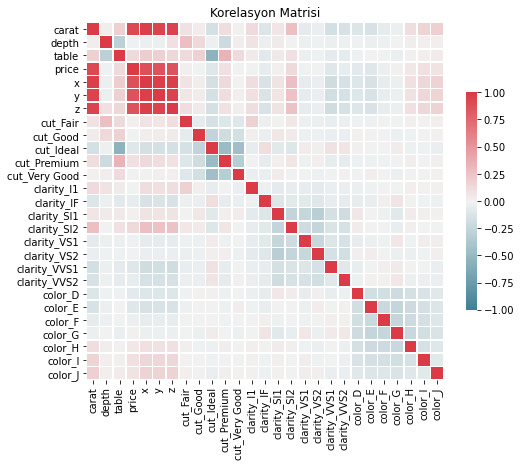

In [12]:
# KORELASYON MATRİSİ RENKLERLE
import seaborn as sns


f, ax = plt.subplots(figsize=(8, 8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df.corr(), cmap=cmap, vmax=1.0, vmin=-1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Korelasyon Matrisi')


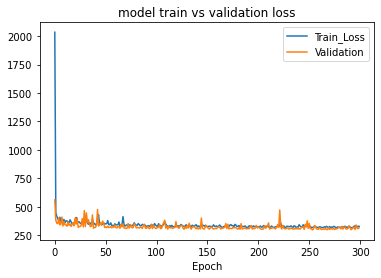

In [13]:

# model loss
plt.plot(history.history['loss'],label='denemee1232')
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.xlabel('Epoch')
plt.legend(['Train_Loss', 'Validation'], loc='upper right')
plt.show()
plt.close()


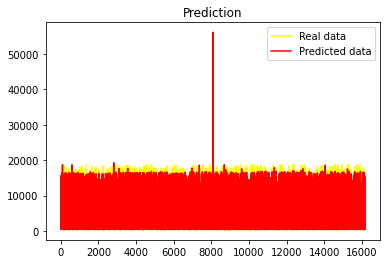

In [14]:
# model prediction vs y_test
plt.plot(Y_test, color = 'yellow', label = 'Real data')
plt.plot(preds, color = 'red', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()
plt.close()


In [15]:
print("Learning Rate:", lr)
print("Epoch:",num_epochs)
print("Batch size:",batch_size)
print('Artifical Neural Network:')
print('Mean Absolute Error:', mean_absolute_error(Y_test,preds))
print('Explained Variance Score:', explained_variance_score(Y_test,preds))
print('R2 Score:', r2_score(Y_test,preds))
print('Mean Squared Error:', mean_squared_error(Y_test,preds))


Learning Rate: 0.1
Epoch: 300
Batch size: 512
Artifical Neural Network:
Mean Absolute Error: 333.047200271895
Explained Variance Score: 0.9668599912822751
R2 Score: 0.9662182708354996
Mean Squared Error: 543171.6586617355


In [16]:
#YagmurOZDEN